<a href="https://colab.research.google.com/github/nechebarrena/HOML/blob/main/HOML_cap_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAPITULO 5 - HANDS ON MACHINE LEARNING
## Support Vector Machines
En este archivo se encuentran los ejemplos propuestos en el capitulo y algunas anotaciones tomadas del mismo.

En este capitulo el libro el algoritmo Support Vector Machine, el cual puede ser utilizado tanto para tareas de clasificacion como de regresion.

## SVM como clasificador

La idea basica de todo algoritmo clasificador es poder separar en el espacio de features las distintas clases presentes en el problema. En particular el metodo de SVM busca separar las clases maximizando la distancia entre cada una de las clases y la frontera de clasificacion entre ellas. Esto se suele llamar "Large margin classification". La figura 5.1 del libro ejemplifica esto de forma muy clara. En realidad, la distancia que busca maximizar no es la de toda la clase (el centro de masa por ejemplo) sino la de "la instancia mas cercana". Esto significa que agregar instancias nuevas a una de las clases puede no cambiar en lo absoluto el resultado del algoritmo si no cambia la instancia mas cercana. A estas instancias se las llama "support vectors" y de ahi el nombre del algoritmo.

## Hard margin classification
Tal como explique recien, el algoritmo no permite que haya instancias que queden del lado incorrecto de la frontera entre clases. O sea, el clasificador debe lograr una clasificacion perfecta. Esto solo es posible cuando la division entre clases es lineal. En cualquier otro caso no se podra realizar. Aunque es algo deseable no siempre es posible.

## Soft margin classification
Una posible solucion para los problemas que no son separables linealmente es permitr que queden instancias "del lado correcto". A estas instancias las llamamos "margin violations" porque justamente violan la frontera encontrada. En general uno busca la minima cantidad de violaciones pero a su vez tratando de mantener la mayor generalizacion posible del algoritmo. En general las implementaciones de metodos SVM cuentan con un parametro que permite elegir entre estas dos situaciones, donde uno prefiere mas o menos cantidad de violaciones a la frontera. En Sklearn el hiperparametro que regula esto es $C$. Cuanto mas bajo es el valor de $C$ mas violaciones permitimos y cuanto mas alto, menos. El libro presenta un ejemplo de implementacion utilizando $LinearSVC$ de sklearn para el dataset de iris.



   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                5.1               3.5  ...               0.2       0
1                4.9               3.0  ...               0.2       0
2                4.7               3.2  ...               0.2       0
3                4.6               3.1  ...               0.2       0
4                5.0               3.6  ...               0.2       0

[5 rows x 5 columns]
[0 1 2]


Text(0, 0.5, 'petal width (cm)')

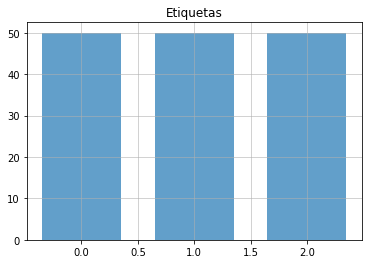

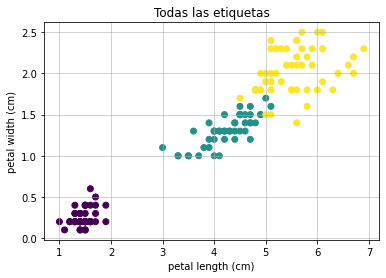

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

iris_data = datasets.load_iris()
df_iris = pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
df_iris['target'] = pd.Series(iris_data.target)
print(df_iris.head())
etiquetas = df_iris['target'].unique()
print(etiquetas)
hist_max,bin_edges = np.histogram(df_iris['target'], bins=3, range=(0, 3))
plt.bar(bin_edges[:-1], hist_max, width = 0.7,alpha=0.7,label='Etiquetas')
plt.grid(axis="both", alpha=0.7)
plt.title('Etiquetas')

plt.figure()
plt.scatter(df_iris["petal length (cm)"],df_iris["petal width (cm)"],c=df_iris["target"])
plt.grid(axis="both", alpha=0.7)
plt.title("Todas las etiquetas")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")



El libro propone primero realizar una clasificacion binaria utilizando un algoritmo de SVD. Para esto voy a hacer una division parecida a la que hice en el capitulo 3 (cuando clasifique 5 y no 5). En este caso voy a considerar las etiquetas correspondientes a 2 y las que no son dos. La etiqueta 2 se corresponde con la flor "Iris virginica".


Text(0.5, 1.0, 'Etiquetas')

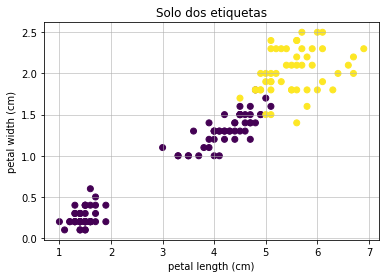

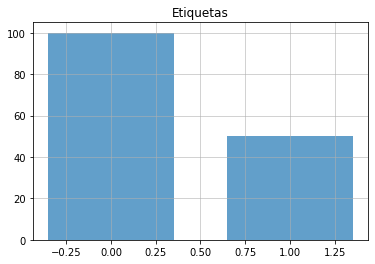

In [2]:
target = (df_iris["target"] == 2).astype(np.float64)
plt.figure()
plt.scatter(df_iris["petal length (cm)"],df_iris["petal width (cm)"],c=target)
plt.grid(axis="both", alpha=0.7)
plt.title("Solo dos etiquetas")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

plt.figure()
hist_max,bin_edges = np.histogram(target, bins=2, range=(0, 2))
plt.bar(bin_edges[:-1], hist_max, width = 0.7,alpha=0.7,label='Etiquetas')
plt.grid(axis="both", alpha=0.7)
plt.title('Etiquetas')

Armo el dataset mas ordenado y uso el clasificador SVM.

In [3]:
X = df_iris[["petal length (cm)","petal width (cm)"]].copy()
y = pd.DataFrame(target)
print(len(X))
print(len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

svm_clf = Pipeline([("scaler", StandardScaler()),("linear_svc", LinearSVC(C=1, loss="hinge")),])
svm_clf.fit(X_train, y_train)

150
150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

Ahora que tengo el modelo armado y entrenado voy a usarlo para predecir y ver como funciona.

Text(0, 0.5, 'petal width (cm)')

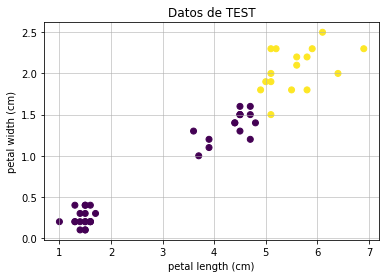

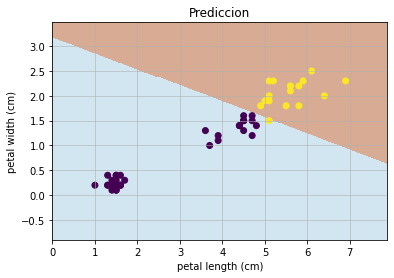

In [4]:
y_pred = svm_clf.predict(X_test)
plt.figure()
plt.scatter(X_test["petal length (cm)"],X_test["petal width (cm)"],c=y_test['target'])
plt.grid(axis="both", alpha=0.7)
plt.title("Datos de TEST")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")


h = .02     
x_min, x_max = X["petal length (cm)"].min() - 1, X["petal length (cm)"].max() + 1
y_min, y_max = X["petal width (cm)"].min() - 1, X["petal width (cm)"].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.figure()
plt.imshow(Z, interpolation="nearest",extent=(xx.min(), xx.max(), yy.min(), yy.max()),cmap=plt.cm.Paired, aspect="auto", origin="lower",alpha=0.5)
plt.scatter(X_test["petal length (cm)"],X_test["petal width (cm)"],c=y_test['target'])
plt.grid(axis="both", alpha=0.7)
plt.title("Prediccion")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")



En el ultimo grafico se puede ver las predicciones hechas por el modelo y la region correspondiente a cada clase. En este punto se vuelve evidente la linealidad de las regiones encontradas. 
Otra forma de invocar un algoritmo de SVD lineal en Sklearn es usando SVC(kernel="linear", C=1). O sea, invocando un algortimo generico de SVM pero utilizando un Kernel lineal. 
Ademas podemos utilizar SGDClassifier(loss="hinge",alpha=1/(m*C)) que invoca un algoritmo SVM lineal pero utilizando el metodo del descenso del gradiente para su entrenamiento. 

## Clasificador NO lineal

Los problemas donde la division de clases se puede realizar utilizando una frontera lineal son solo un grupo particular. En general la division puede requerir una frontera arbitrariamente complicada para separar entre clases. Una forma de resolver este problema es agregando alguna variable no lineal y esperando que en este nuevo espacio de variables el problema si sea linealmente separable. 
Para ejejmplificar esta situacion el libro muestra la figura 5.5 donde se ve un conjunto de datos (y sus etiquetas) representados a lo largo de una unica variable. Este conjunto no es separable utilizando una unica frontera lineal. Para esto se muestra como al introducir una nueva variable no lineal las clases, en el nuevo espacio de variables, si es linealmente separable.

Vamos a probar un ejemplo.

Text(0, 0.5, '$X_1$')

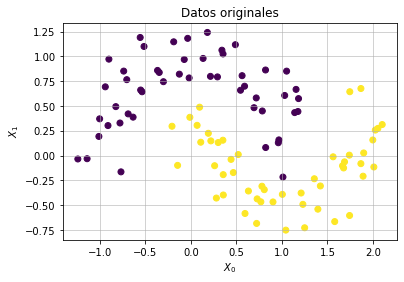

In [5]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
X_n, y_n = make_moons(n_samples=100, noise=0.15)
X = pd.DataFrame(X_n)
y = pd.DataFrame(y_n)

plt.figure()
plt.scatter(X[0],X[1],c=y[0])
plt.grid(axis="both", alpha=0.7)
plt.title("Datos originales")
plt.xlabel(r"$X_0$")
plt.ylabel(r"$X_1$")



Armo un modelo lineal, igual que en el caso anterior, pero ahora voy a agregar nuevos features. Estos nuevos features que voy a agregar van a ser polinomios de los originales. Para eso voy a usar "PolynomialFeatures" de sklearn y lo voy a meter dentro de un pipeline.

In [6]:
polynomial_svm_clf = Pipeline([("poly_features", PolynomialFeatures(degree=3)),("scaler", StandardScaler()),("svm_clf", LinearSVC(C=10, loss="hinge"))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

polynomial_svm_clf.fit(X_train, y_train)

y_pred = polynomial_svm_clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Ahora que ya arme y entrene el modelo sobre el set de train voy a graficar los resultados de la clasificacion sobre el conjunto de testeo.

Text(0, 0.5, '$X_1$')

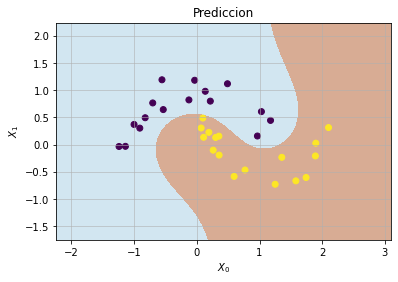

In [7]:
h = .001     
x_min, x_max = X[0].min() - 1, X[0].max() + 1
y_min, y_max = X[1].min() - 1, X[1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = polynomial_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.figure()
plt.imshow(Z, interpolation="nearest",extent=(xx.min(), xx.max(), yy.min(), yy.max()),cmap=plt.cm.Paired, aspect="auto", origin="lower",alpha=0.5)
plt.scatter(X_test[0],X_test[1],c=y_test[0])
plt.grid(axis="both", alpha=0.7)
plt.title("Prediccion")
plt.xlabel(r"$X_0$")
plt.ylabel(r"$X_1$")

Este metodo puede funcionar bien para conjunto de datos que no sean demasiado complejos y que por lo tanto no demanden grados muy altos del polinomio. Sin embargo, para problemas mas complejos donde se requieran grados mas altos, puede ser muy engorroso (computacionalmente) trabajar con los montones de features agregados. Para esto se usa un metodo distinto donde no se agregan nuevos features sino que se modifica el "kernel" del modelo. Vamos a ver este metodo con mas detalle.

## Kernel polinomico

Vamos a resolver el problema anterior pero sin agregar features nuevos. En lugar de eso vamos a modificar el Kernel del algoritmo.


In [8]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([("scaler", StandardScaler()),("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))])
poly_kernel_svm_clf.fit(X_train, y_train)
y_pred = poly_kernel_svm_clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Vamos a graficar los resultados sobre el test.

Text(0, 0.5, '$X_1$')

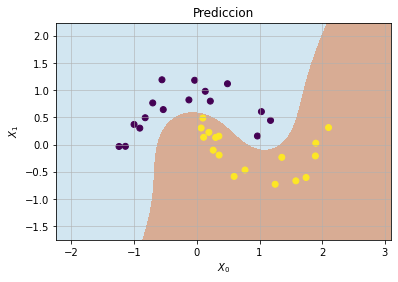

In [9]:
h = .001     
x_min, x_max = X[0].min() - 1, X[0].max() + 1
y_min, y_max = X[1].min() - 1, X[1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = poly_kernel_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.figure()
plt.imshow(Z, interpolation="nearest",extent=(xx.min(), xx.max(), yy.min(), yy.max()),cmap=plt.cm.Paired, aspect="auto", origin="lower",alpha=0.5)
plt.scatter(X_test[0],X_test[1],c=y_test[0])
plt.grid(axis="both", alpha=0.7)
plt.title("Prediccion")
plt.xlabel(r"$X_0$")
plt.ylabel(r"$X_1$")

Ahora vamos a hacer lo mismo pero para un polinomio de grado mucho mas alto. En principio seria esperable que al hacer esto aumentemos el overfiting.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0, 0.5, '$X_1$')

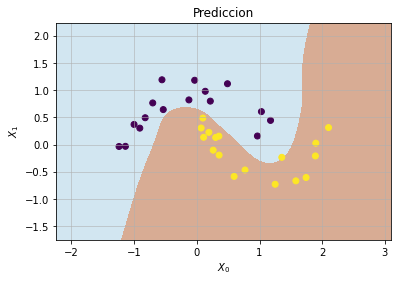

In [12]:
poly_kernel_svm_clf = Pipeline([("scaler", StandardScaler()),("svm_clf", SVC(kernel="poly", degree=10, coef0=1, C=5))])
poly_kernel_svm_clf.fit(X_train, y_train)
y_pred = poly_kernel_svm_clf.predict(X_test)
h = .001     
x_min, x_max = X[0].min() - 1, X[0].max() + 1
y_min, y_max = X[1].min() - 1, X[1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = poly_kernel_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.figure()
plt.imshow(Z, interpolation="nearest",extent=(xx.min(), xx.max(), yy.min(), yy.max()),cmap=plt.cm.Paired, aspect="auto", origin="lower",alpha=0.5)
plt.scatter(X_test[0],X_test[1],c=y_test[0])
plt.grid(axis="both", alpha=0.7)
plt.title("Prediccion")
plt.xlabel(r"$X_0$")
plt.ylabel(r"$X_1$")

Ademas usamos un parametro del modelo llamado "coef0". Este parametro nos indica cuanta importancia le tiene que dar el modelo a los polinomios de grados mas altos. En realidad funciona como un "normalizador" para resolver el problema de que polinomios de grados muy altos reducen la diferencia de valores por debajo de 1 y la aumentan para valores mayores a 1. 

## Atributos de similaridad

De igual forma que en el ejemplo anterior agregamos nuevos atributos utilizando una funcion polinomica se pueden agregar atributos siguiendo otras reglas. Por ejmplo se atributos de similaridad. La similaridad se mide entre cada una de las instancias del conjunto de train y una serie de "landmarks". Una landmark es una posicion en el espacio de los atributos originales. Luego se fija una funcion para medir cuan "similar" es una instancia de entrenamiento a esta posicion fija. El libro muestra un ejemplo con una funcion gaussiana (RBF) para un caso unidimensional. 
Por ejmplo; Pensemos que utilizamos esta funcion gaussiana $\phi_{\gamma}(x,l) = e^{(-\gamma||x-l||^2)}$.

Supongamos que ponemos una landmark en $l=-2$ y tenemos una instancia en $x=-1$ y $\gamma = 0.3$. En tal caso nuestra funcion de similaridad es $\phi_{\gamma}(-1,-2) = e^{(-0.3||-1-(-2)||^2)} = e^{-0.3} = 0.74$. Esta misma operacion la debemos repetir para todas las instancias. Cada landmark que decidamos incorporar nos agrega un atributo nuevo. Ahora podemos hacer la clasificacion de la misma forma que la hicimos en el ejemplo polinomico pero con un SVM lineal. 
La pregunta obvia es como seleccionar los landmarks y cuantos agregar. El libro sugiere ubicar los landmarks directamente en la ubicacion de las instancias de entrenamiento. ¿Cuantos?...el libro sugiere utilizar tantos como instancias tengamos, pero nos alerta del problema que esto implica para datasets muy grandes. En tales casos estariamos agregando muchos atributos nuevos y puede complejizar mucho el problema computacional. Para ver un ejemplo mas graficos el libro muestra la imagen 5.8 donde muestra el mismo ejemplo que yo calcule aca pero en un grafico para todas las instancias.  

## Kernel Gaussiano (RBF)
Recordemos que anteriormente cuando incorporamos atributos polinomicos nos dimos cuenta de que esto podia aumentar mucho la complejidad computacional por la cantidad de variables agregadas. En ese caso utilizamos el truco del kernel (que aun no explicamos mucho) pero que basicamente consiste en dejar los atributos fijos y cambiar la forma en que el metodo SVM calcula los vectores de soporte. Bueno, podemos hacer lo mismo pero para un kernel con funciones gaussianas. Vamos a volver sobre el problema anterior pero esta vez vamos a usar un kernel gaussiano y veamos como nos va.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


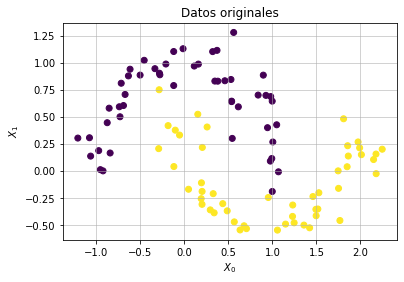

In [17]:
X_n, y_n = make_moons(n_samples=100, noise=0.15)
X = pd.DataFrame(X_n)
y = pd.DataFrame(y_n)

plt.figure()
plt.scatter(X[0],X[1],c=y[0])
plt.grid(axis="both", alpha=0.7)
plt.title("Datos originales")
plt.xlabel(r"$X_0$")
plt.ylabel(r"$X_1$")

rbf_kernel_svm_clf = Pipeline([("scaler", StandardScaler()),("svm_clf", SVC(kernel="rbf", gamma=5, C=10))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
rbf_kernel_svm_clf.fit(X_train, y_train)
y_pred = rbf_kernel_svm_clf.predict(X_test)

Text(0, 0.5, '$X_1$')

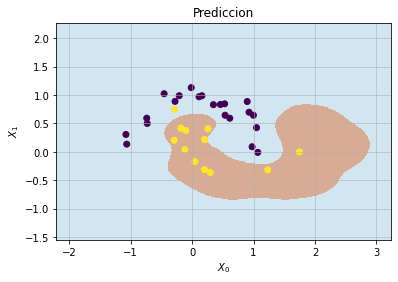

In [18]:
h = .01     
x_min, x_max = X[0].min() - 1, X[0].max() + 1
y_min, y_max = X[1].min() - 1, X[1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = rbf_kernel_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.figure()
plt.imshow(Z, interpolation="nearest",extent=(xx.min(), xx.max(), yy.min(), yy.max()),cmap=plt.cm.Paired, aspect="auto", origin="lower",alpha=0.5)
plt.scatter(X_test[0],X_test[1],c=y_test[0])
plt.grid(axis="both", alpha=0.7)
plt.title("Prediccion")
plt.xlabel(r"$X_0$")
plt.ylabel(r"$X_1$")

Para este modelo utilizamos dos parametros, $\gamma$ y $C$. El parametro $\gamma$ tiene un significado similar al que vimos en la funcion de similaridad. O sea, cuanto mas grande es este parametro mas fina es la campana. Esto significa que puede inducir overfiting. De alguna forma lo podemos usar como un parametro de regularizacion.

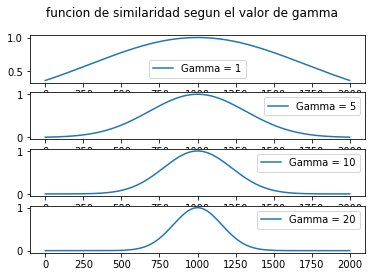

In [39]:
gamma = [1 , 5, 10,20]
fig, axs = plt.subplots(len(gamma))
fig.suptitle('funcion de similaridad segun el valor de gamma')
for k in range(len(gamma)):
  y = [np.exp(-gamma[k]*((x/1000 - 1)**2)) for x in range(2000)  ]
  axs[k].plot(y,label='Gamma = ' + str(gamma[k]))
  axs[k].legend()

